# Analysis of filtered strains with cas
This Notebook generates the following plots:
* Fig. 2A: spacer length distribution
* Fig. 2B: repertoire size distribution
* Fig. 2C: repertoire size vs. spacer length
* Fig. S2A: all datapoints
* Fig. S2H: genome length vs. spacer length
* Fig. S4D: no. of CRISPR and cas loci
* Fig. S4E: 1 copy of cas1 and cas2

The above use the same dataset filtered by species. In addition, the following plots are generated using different filters:
* Fig. S2D: filtered by genus
* Fig. S2E: no filtering

In [1]:
using DelimitedFiles, Random, Statistics, PyPlot
rc(:svg,fonttype=:none)

using NBInclude
@nbinclude("CRISPRCasdb.ipynb")

include("get_repertoires.jl")
include("generate_scaling_plot.jl")
include("permutationtests.jl");

## Read filtered strains from file and get repertoire sizes and mean spacer lengths
files containing list of species and gbs:
* `gbs_cc_filter.csv`: filtered by species and additionally to share zero spacers between them (see `analysis-shared-spacers.ipynb`)
* `gbs_cc.csv`: filtered by species

Note: gbs are randomly shuffled to eliminate systematic bias when binning.

In [2]:
fc = "filtered/gbs_cc_filter.csv"
# fc = "filtered/gbs_cc.csv"

gbs = shuffle(readdlm(fc,',')[:,2])

num_gbs, repsizes, spacerlens = get_repertoires(gbs)
mspacerlens = mean.(spacerlens);

2577 repertoires returned.


## Fig. 2A: spacer length distribution

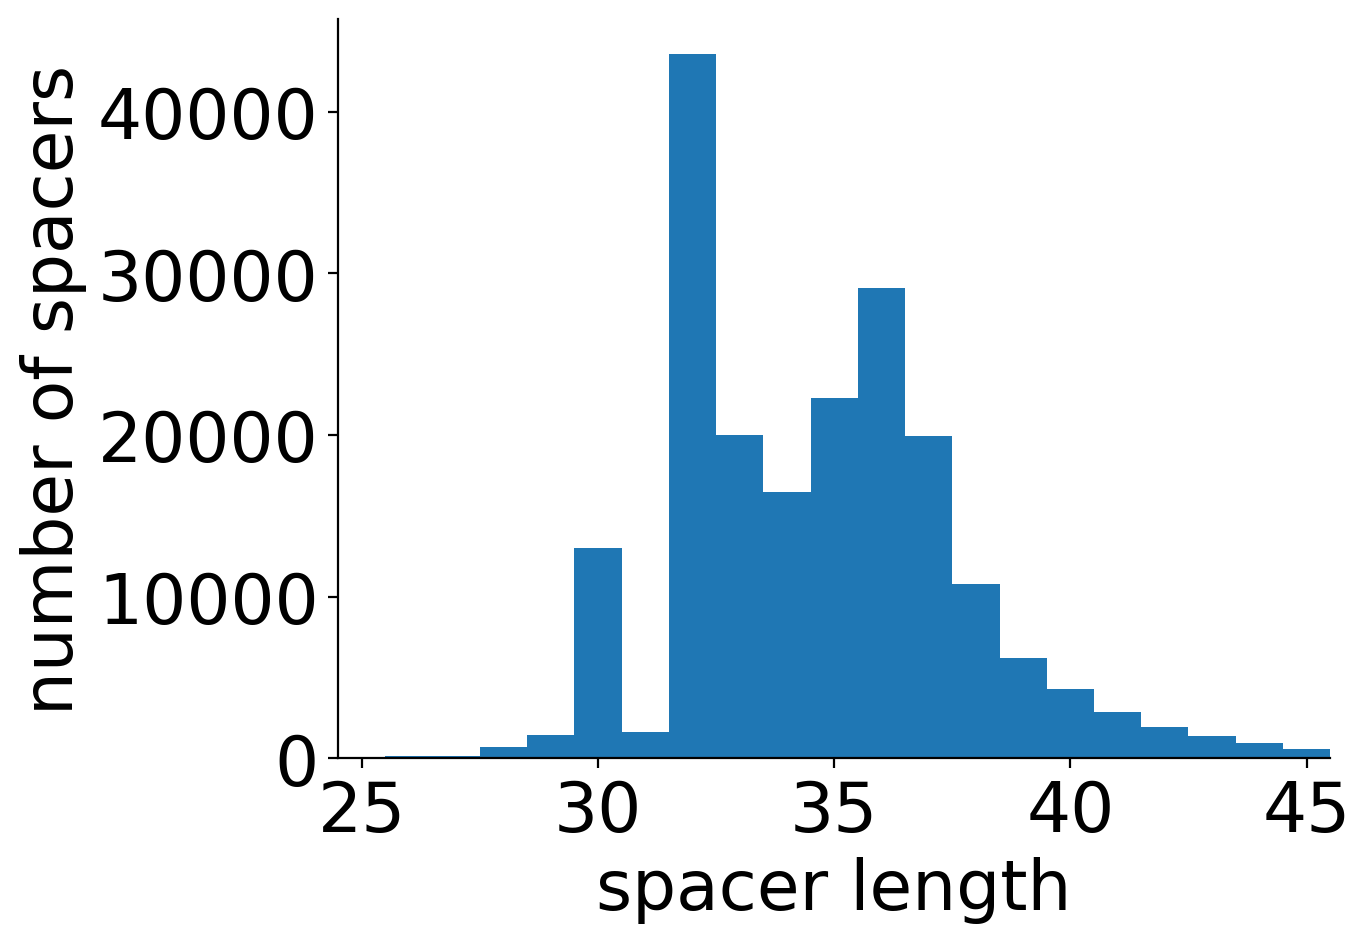

In [3]:
fig, ax = subplots(dpi=200)

# # mean spacer lengths
# hist(mspacerlens, bins=24.5:45.5)

# all spacers
spacerlens_all = vcat(spacerlens...)
hist(spacerlens_all, bins=24.5:45.5)

fs = 25
xlabel("spacer length", fontsize=fs)
ylabel("number of spacers", fontsize=fs)

xlim(24.5,45.5)

xticks(25:5:45, fontsize=fs)
yticks(0:10000:40000, fontsize=fs)

ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)

# savefig("spacerlen.svg",format="svg")

## Fig. 2B: repertoire size distribution

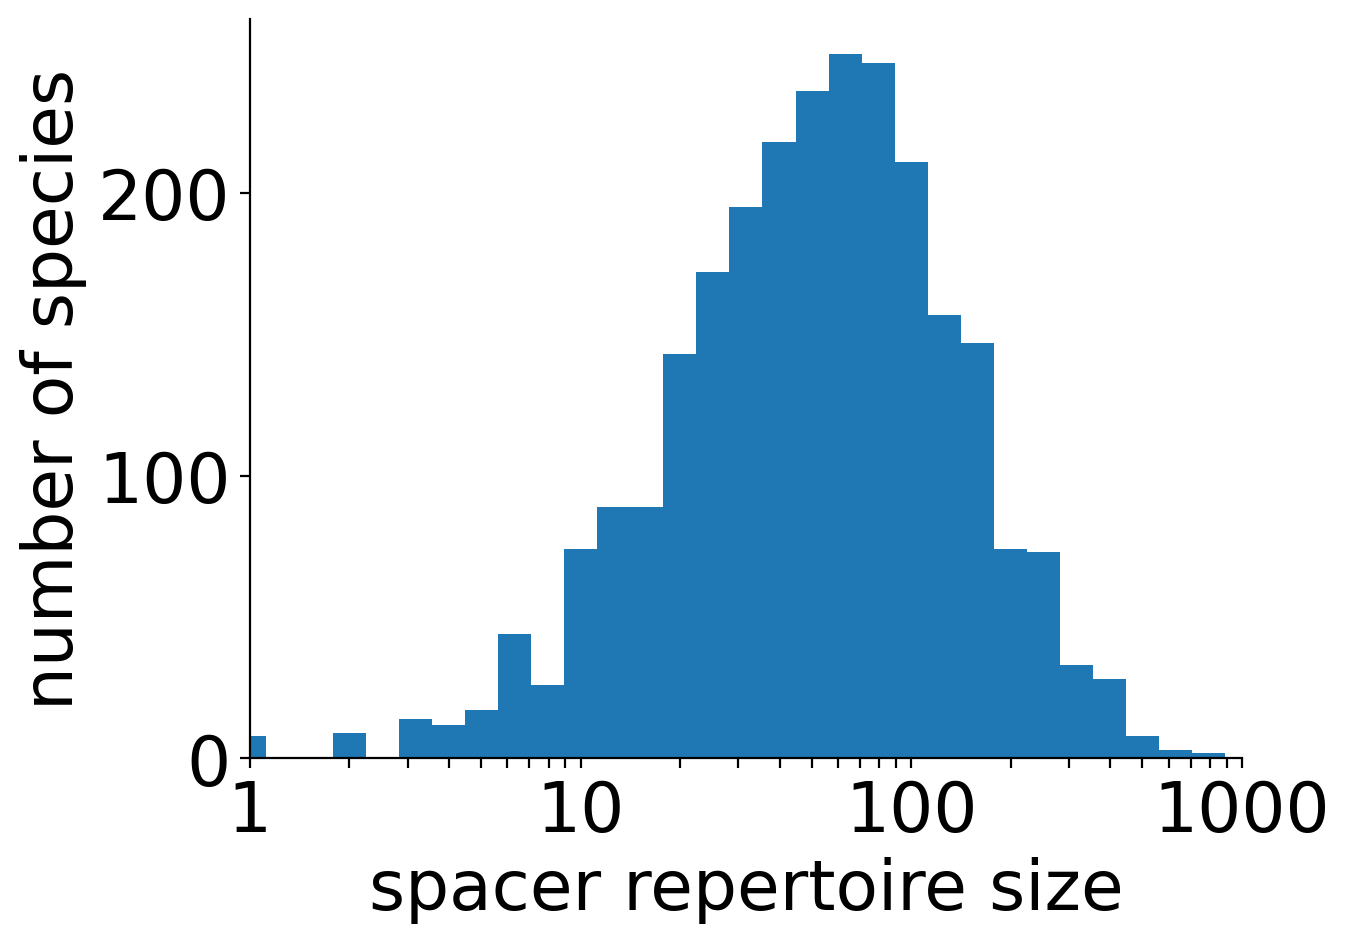

In [4]:
fig, ax = subplots(dpi=200)

hist(log10.(repsizes), bins=-0.05:0.1:2.95)

fs = 25
xlabel("spacer repertoire size", fontsize=fs)
ylabel("number of species", fontsize=fs)

xlim(0,3)

xtick_vals = log10.(vcat(collect(1:10),collect(20:10:100),collect(200:100:1000)))
xtick_labels = string.(vcat(["1"],fill("",8),["10"],fill("",8),["100"],fill("",8),["1000"]))
xticks(xtick_vals,xtick_labels, fontsize=fs)
yticks(0:100:200, fontsize=fs)

ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)

# savefig("repsize.svg",format="svg")

## Fig. 2C: repertoire size vs. spacer length

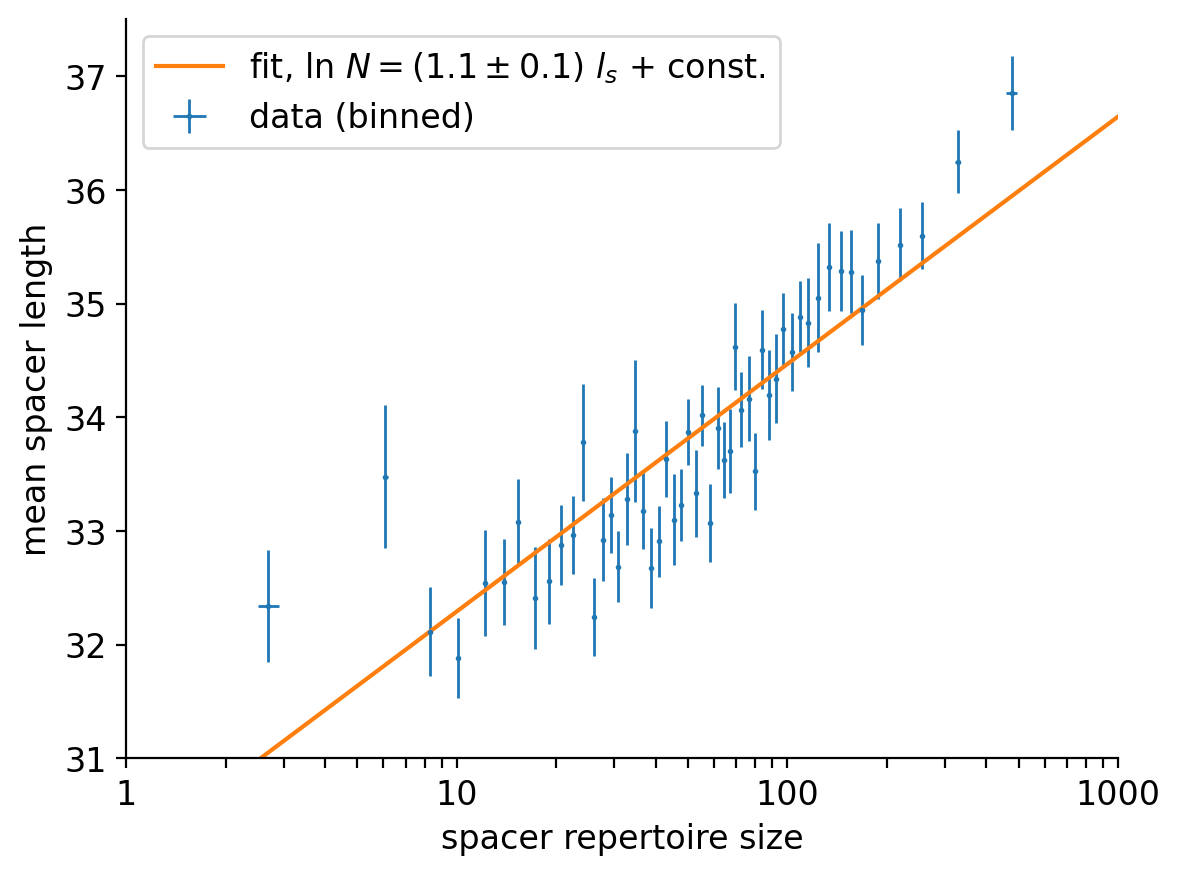

In [5]:
rho_fit, m_fit, c_fit, dm_fit, dc_fit, propconst1, dpropconst1, inds_inbins, mean_logN_inbins, mean_l_inbins, stderr_logN_inbins, stderr_l_inbins =
    generate_scaling_plot(repsizes, mspacerlens, alldata=false,
    saveplot=false);

In [6]:
# pvalue_linreg(m_fit, log10.(repsizes), mspacerlens)

output: 0.0

In [7]:
# pvalue_Pearson(rho_fit, log10.(repsizes), mspacerlens)

output: 0.0

## Fig. S2A: repertoire size vs. spacer length, all datapoints

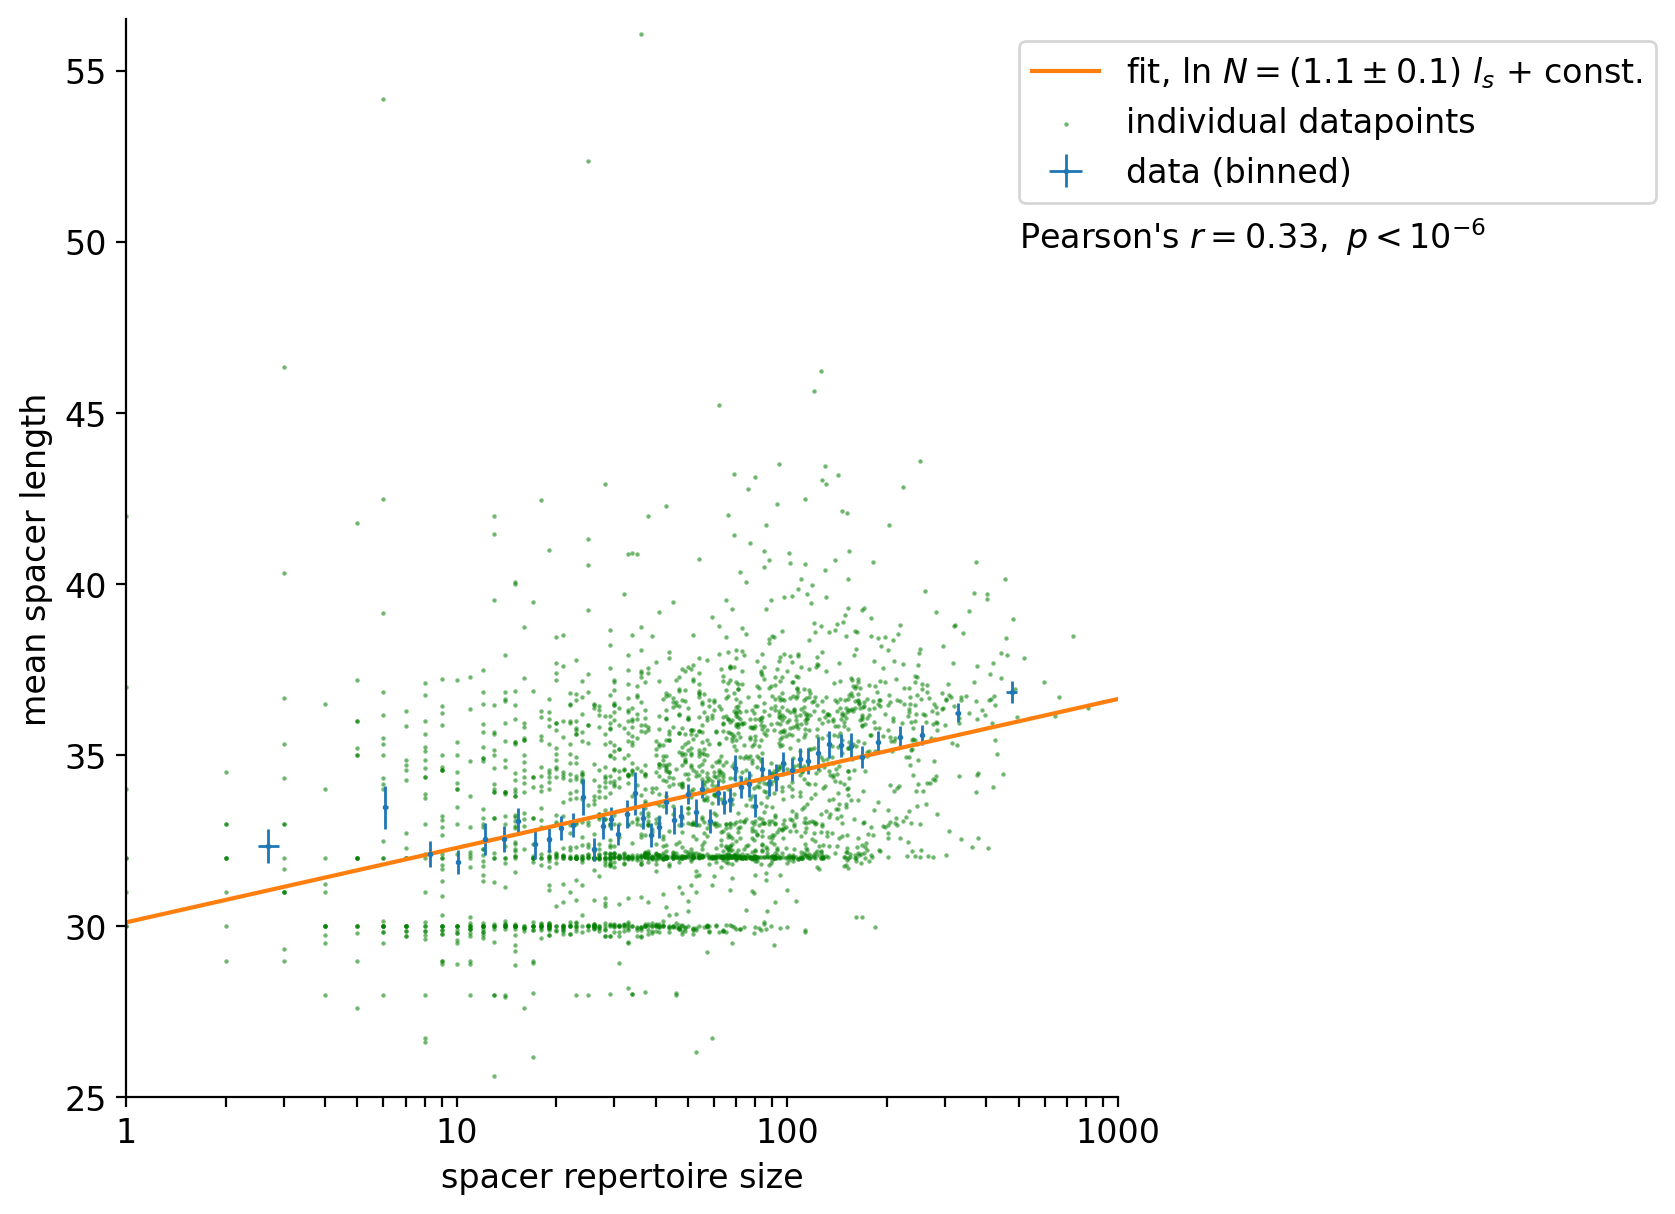

In [8]:
generate_scaling_plot(repsizes, mspacerlens,
    saveplot=false);

In [9]:
# no. of datapoints excluded
inds = findall(x->x<25||x>56.5,mspacerlens)
[repsizes[inds] mspacerlens[inds]]

0×2 Matrix{Float64}

## Fig. S2H: genome length vs. spacer length
### create `genomelens` for further analysis

In [10]:
genomelens = Int[genbank2L[gbs[i]] for i in 1:num_gbs];

### marginal distribution

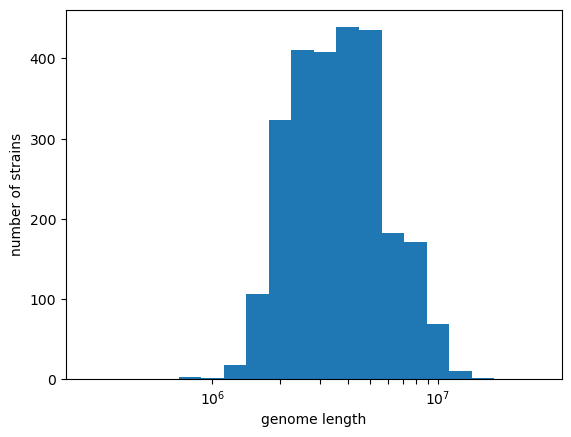

In [11]:
hist(log10.(genomelens), bins=5.45:0.1:7.45)

xlabel("genome length")
ylabel("number of strains")

xtick_vals = log10.(collect(1e6:1e6:1e7))
xtick_labels = vcat(["\$10^6\$"],fill("",8),["\$10^7\$"])
xticks(xtick_vals,xtick_labels)

# savefig("genomelen.svg",format="svg");

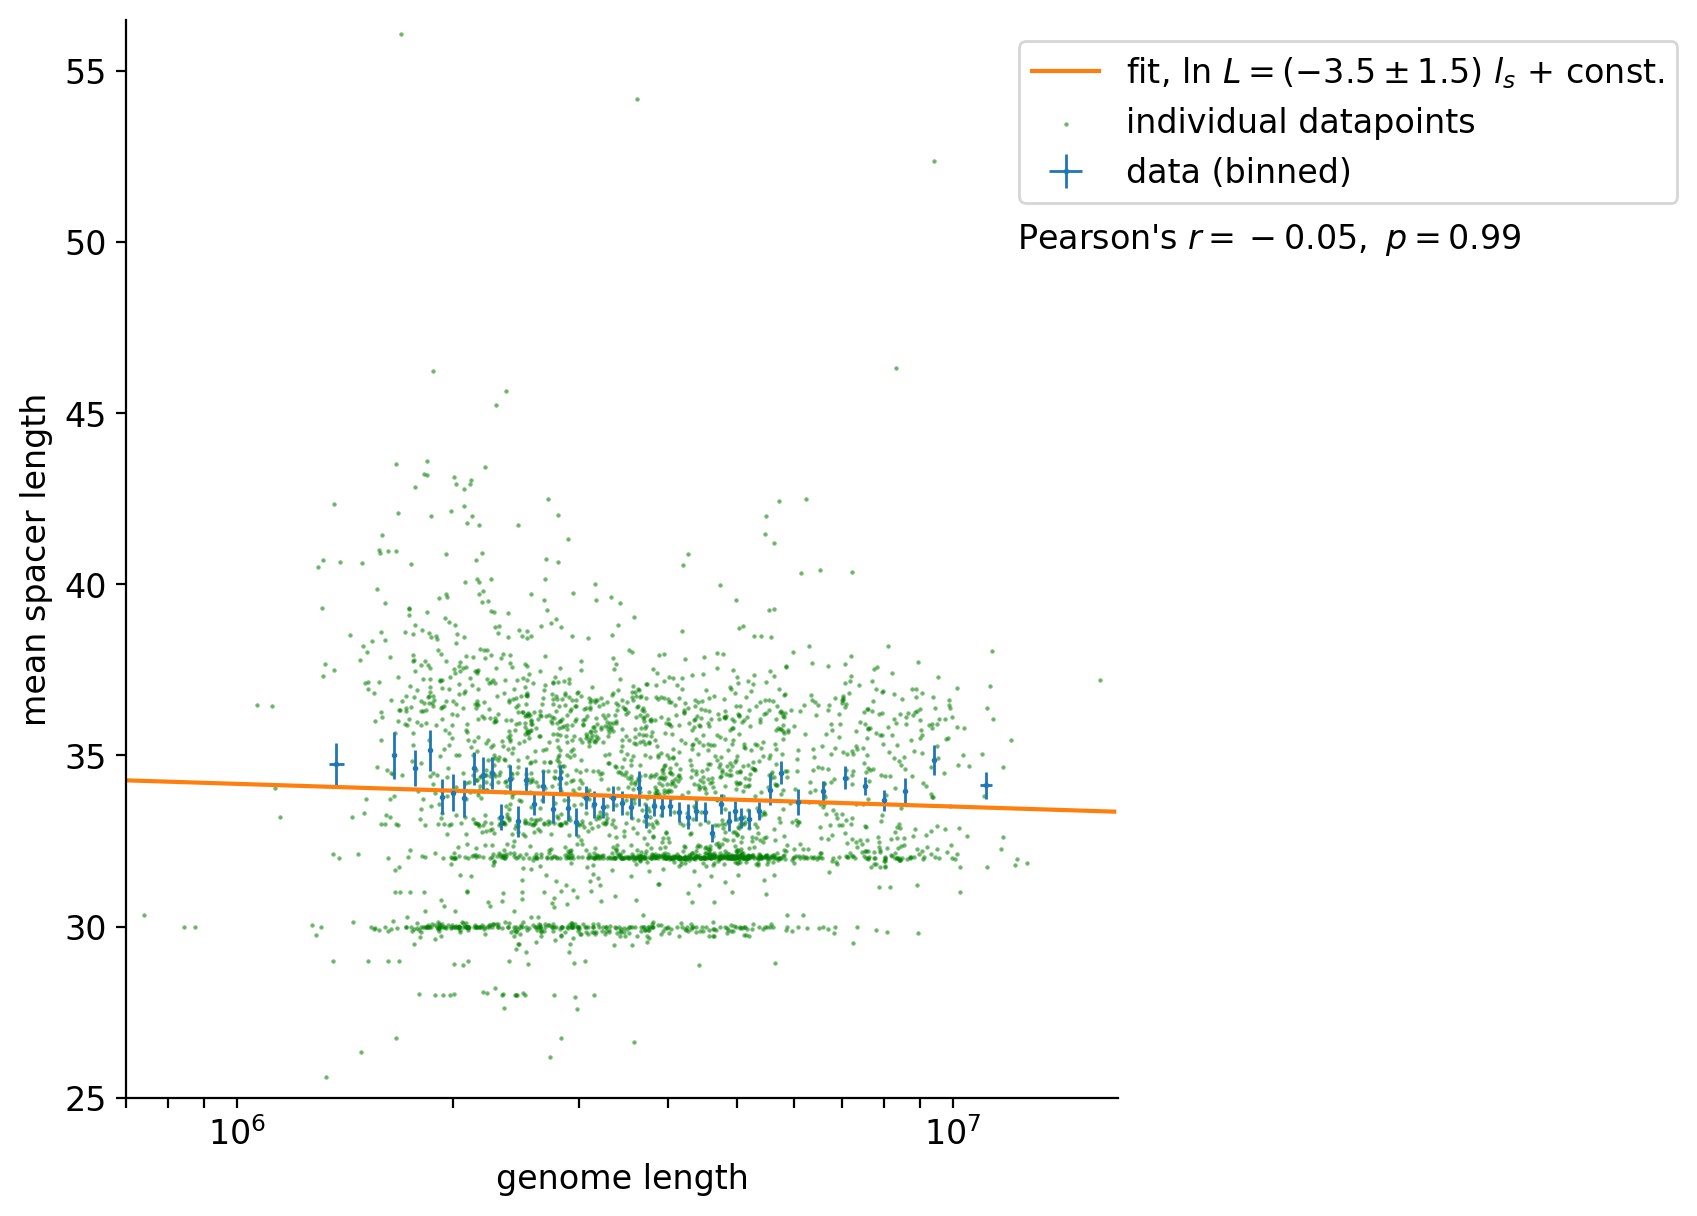

In [12]:
generate_scaling_plot(genomelens, mspacerlens,
    x="L",
    pvalue=0.99,
    saveplot=false);

In [13]:
# pvalue_linreg(m_L, log10.(genomelens), mspacerlens)

output: 0.991494

In [14]:
# pvalue_Pearson(rho_L, log10.(genomelens), mspacerlens)

output: 0.994472

In [15]:
# no. of datapoints excluded
count(x->x<7e5||x>1.7e7, genomelens)

0

## Fig. S4D: no. of CRISPR and cas loci
### create `numcrisprloci` and `numcasloci` for further analysis

In [16]:
numcrisprloci = Int[length(genbank2crisprloci[gbs[i]]) for i in 1:num_gbs]
numcasloci = Int[length(genbank2casloci[gbs[i]]) for i in 1:num_gbs];

### find mean and standard error in bins

In [17]:
mean_numcrisprloci_inbins = [mean(numcrisprloci[inds]) for inds in inds_inbins]
stderr_numcrisprloci_inbins = [std(numcrisprloci[inds])/sqrt(length(inds)) for inds in inds_inbins]

mean_numcasloci_inbins = [mean(numcasloci[inds]) for inds in inds_inbins]
stderr_numcasloci_inbins = [std(numcasloci[inds])/sqrt(length(inds)) for inds in inds_inbins];

### plot binned data

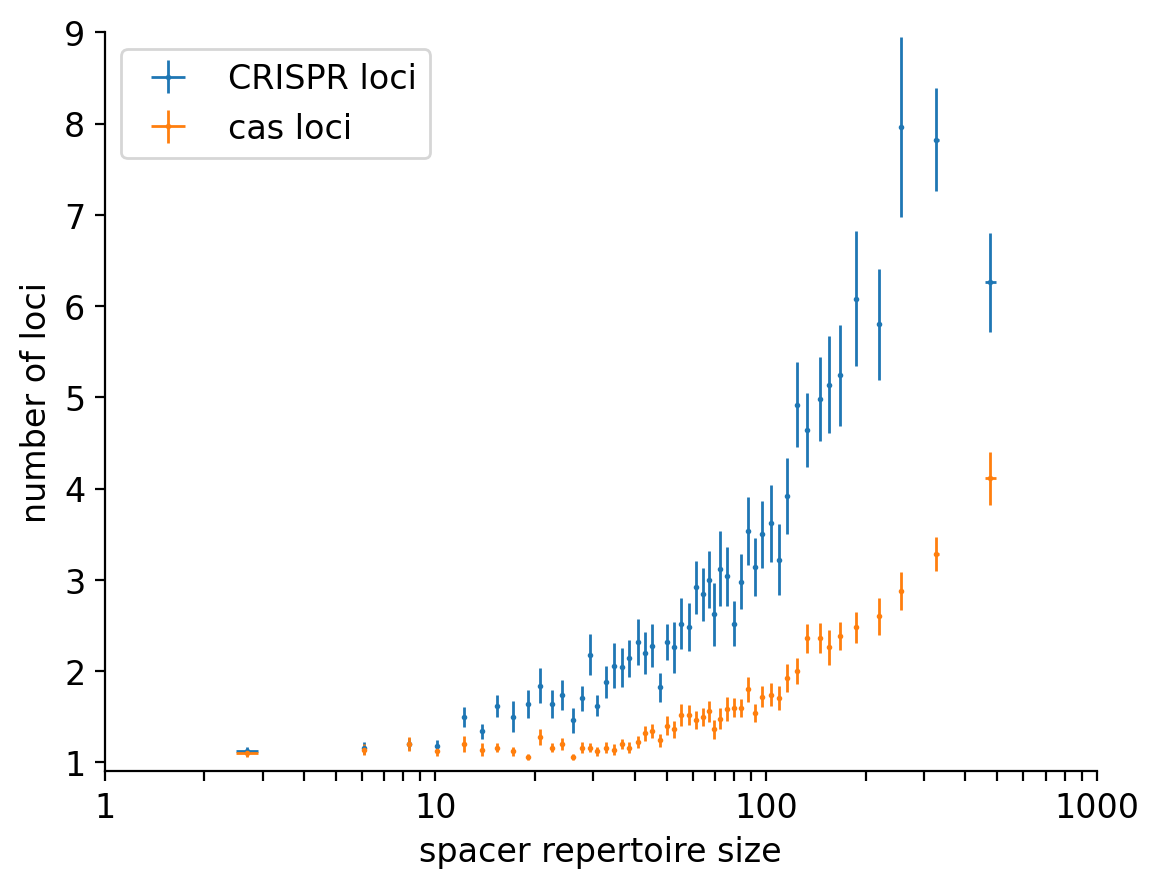

In [18]:
fig, ax = subplots(dpi=200)

# plot mean and standard error of binned data
errorbar(mean_logN_inbins,mean_numcrisprloci_inbins, linestyle="none",marker="o",markersize=1,
    xerr=stderr_logN_inbins,yerr=stderr_numcrisprloci_inbins, elinewidth=1,capsize=0)

errorbar(mean_logN_inbins,mean_numcasloci_inbins, linestyle="none",marker="o",markersize=1,
    xerr=stderr_logN_inbins,yerr=stderr_numcasloci_inbins, elinewidth=1,capsize=0)

fs = 12
xlabel("spacer repertoire size", fontsize=fs)
ylabel("number of loci", fontsize=fs)

xtick_vals = log10.(vcat(collect(1:10),collect(20:10:100),collect(200:100:1000)))
xtick_labels = string.(vcat(["1"],fill("",8),["10"],fill("",8),["100"],fill("",8),["1000"]))
xticks(xtick_vals,xtick_labels, fontsize=fs)
yticks(fontsize=fs)

xlim(0,3)
ylim(0.9,9)

legend(["CRISPR loci","cas loci"], fontsize=fs, loc="upper left")

ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)

# savefig("numloci.svg",format="svg")

## Fig. S4E: repertoire size vs. spacer length, 1 copy of cas1 and cas2

In [19]:
cas1genes = readdlm("CRISPRCasdb/cas1.txt",String)
cas2genes = readdlm("CRISPRCasdb/cas2.txt",String);

In [20]:
numcas1 = zeros(Int,num_gbs)
numcas2 = zeros(Int,num_gbs)

for i in 1:num_gbs
    for cl in genbank2casloci[gbs[i]]
        for g in caslocus2genes[cl]
            if in(g[1],cas1genes) # first entry is gene name
                numcas1[i] += 1
            elseif in(g[1],cas2genes)
                numcas2[i] += 1
            end
        end
    end
end

### strains with one copy of both cas1 & cas2

In [21]:
inds_1c = findall(i->numcas1[i]==1 && numcas2[i]==1
#     && numcrisprloci[i]==1
    ,1:num_gbs)

repsizes_1c = repsizes[inds_1c]
mspacerlens_1c = mspacerlens[inds_1c]

length(inds_1c)

1668

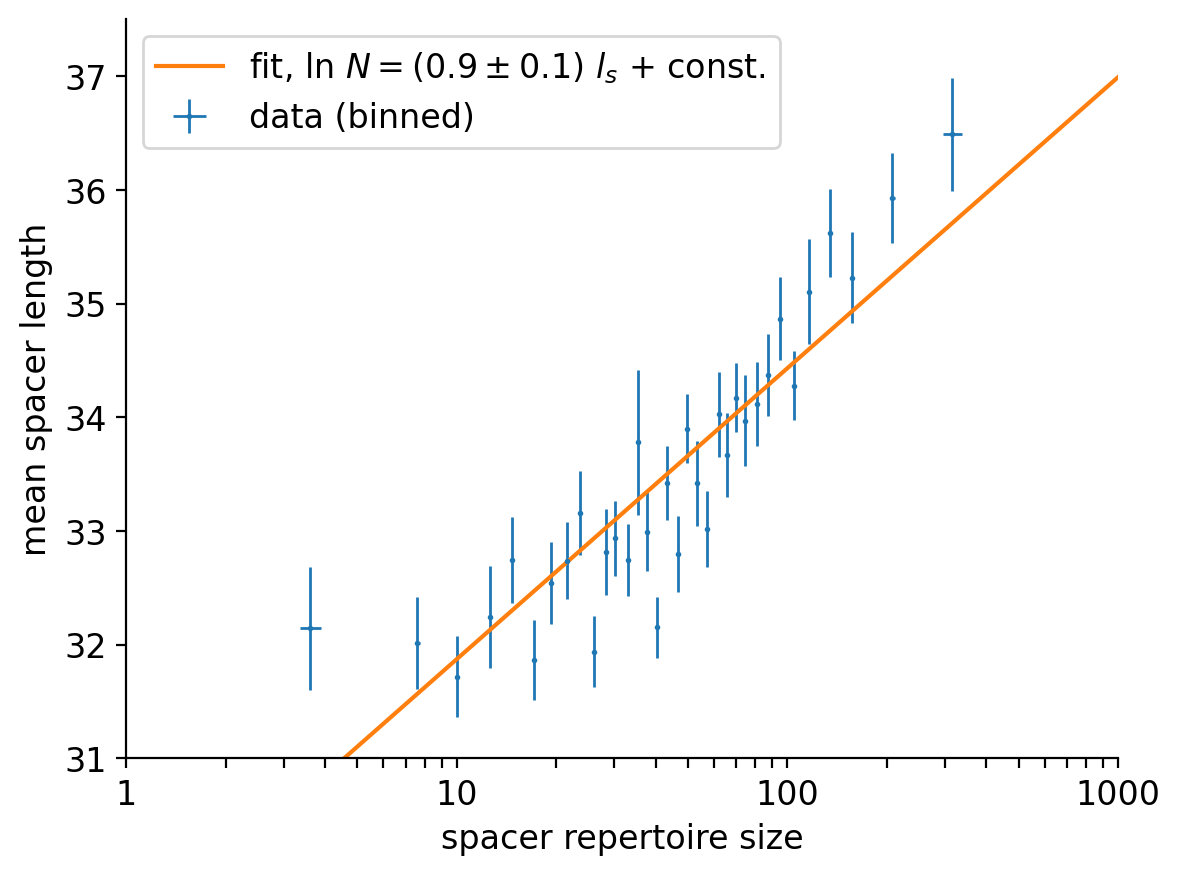

In [22]:
generate_scaling_plot(repsizes_1c, mspacerlens_1c, alldata=false,
    saveplot=false);

## Fig. S2D: repertoire size vs. spacer length, filtered by genus
### Read filtered strains from file and get repertoire sizes and mean spacer lengths
files containing list of species and gbs:
* `gbs_cc_genus.csv`: filtered by genus

In [23]:
fc_gen = "filtered/gbs_cc_genus.csv"

gbs_gen = shuffle(readdlm(fc_gen,',')[:,2])

num_gbs_gen, repsizes_gen, spacerlens_gen = get_repertoires(gbs_gen)
mspacerlens_gen = mean.(spacerlens_gen);

1003 repertoires returned.


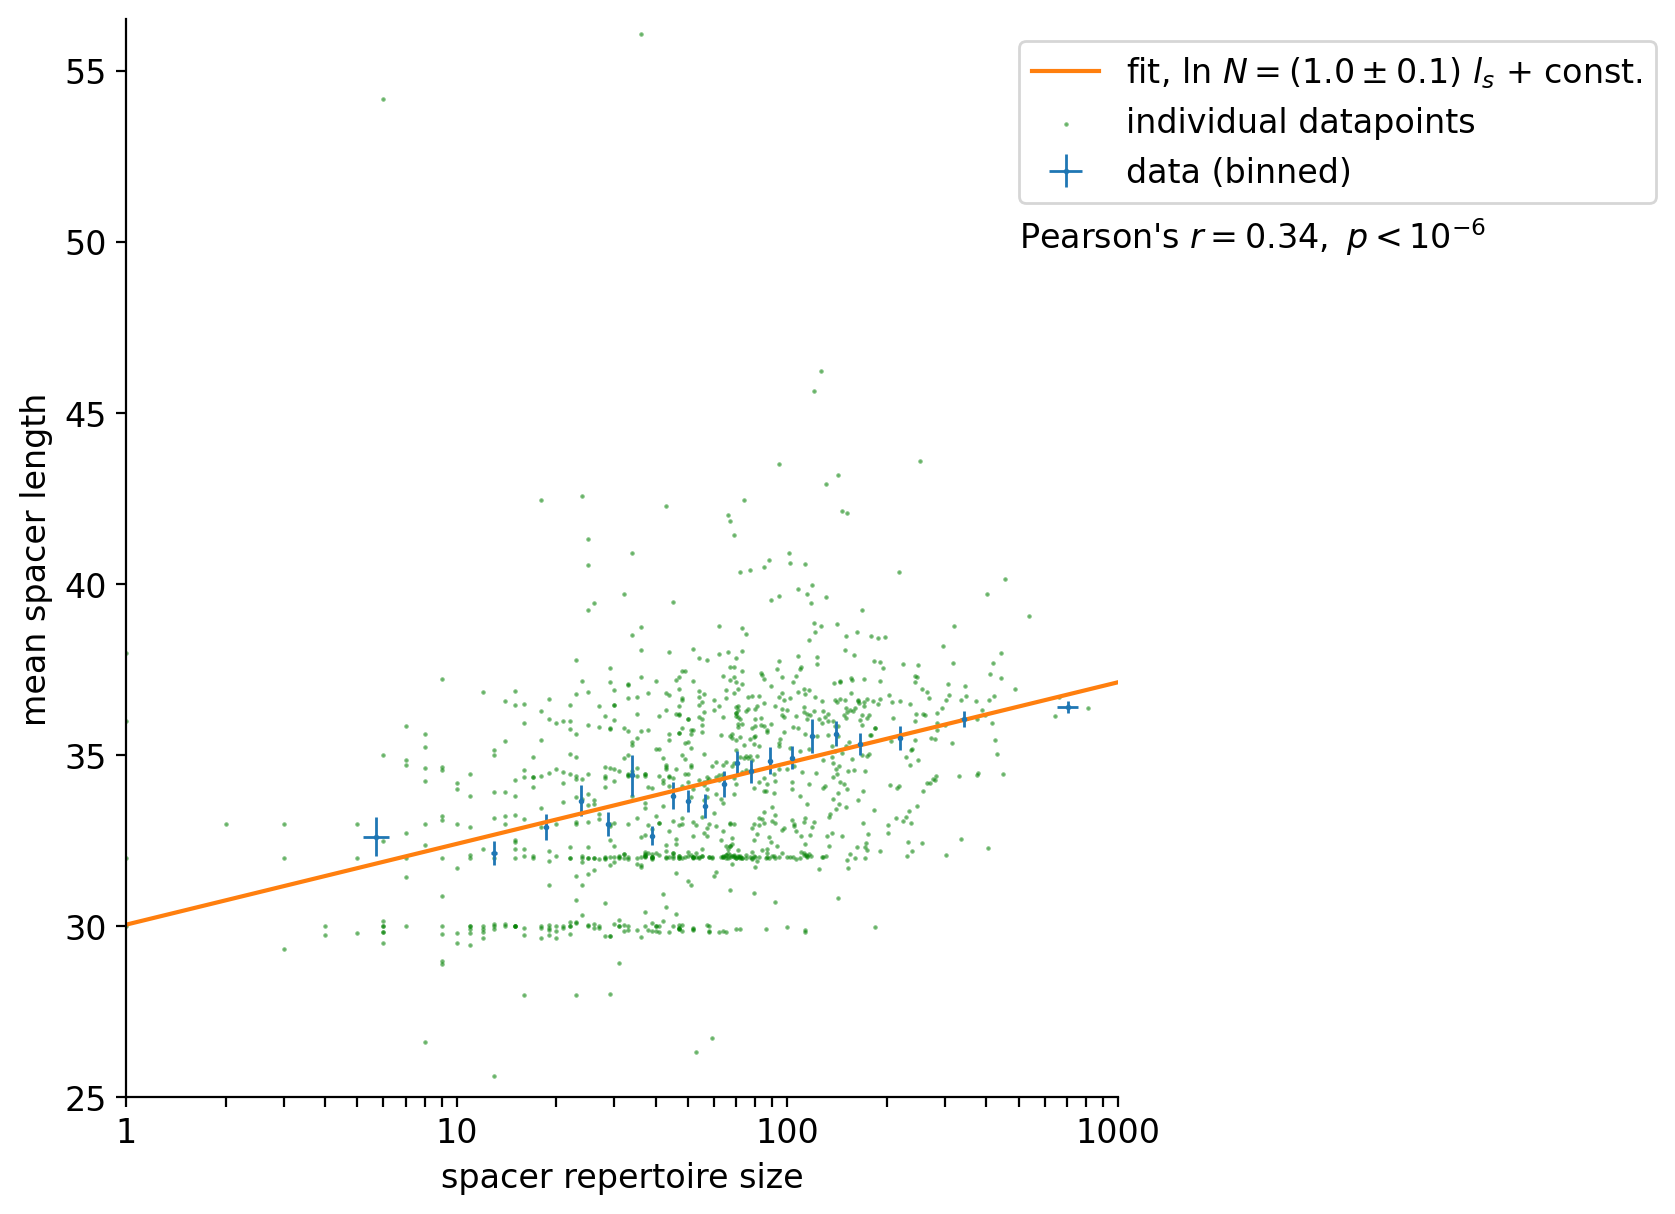

In [24]:
rho_gen, m_gen, c_gen, dm_gen, dc_gen, = generate_scaling_plot(repsizes_gen, mspacerlens_gen,
    saveplot=false);

In [25]:
# pvalue_linreg(m_gen, log10.(repsizes_gen), mspacerlens_gen)

output: 0.0

In [26]:
# pvalue_Pearson(rho_gen, log10.(repsizes_gen), mspacerlens_gen)

output: 0.0

In [27]:
# no. of datapoints excluded
inds = findall(x->x<25||x>56.5,mspacerlens_gen)
[repsizes_gen[inds] mspacerlens_gen[inds]]

0×2 Matrix{Float64}

## Fig. S2E: repertoire size vs. spacer length, no filtering
### Read filtered strains from file and get repertoire sizes and mean spacer lengths
files containing list of gbs only:
* `genbanks_cc.txt`: no filtering

In [28]:
ft = "filtered/genbanks_cc.txt"

gbs_nof = shuffle(readdlm(ft))

num_gbs_nof, repsizes_nof, spacerlens_nof = get_repertoires(gbs_nof)
mspacerlens_nof = mean.(spacerlens_nof);

9862 repertoires returned.


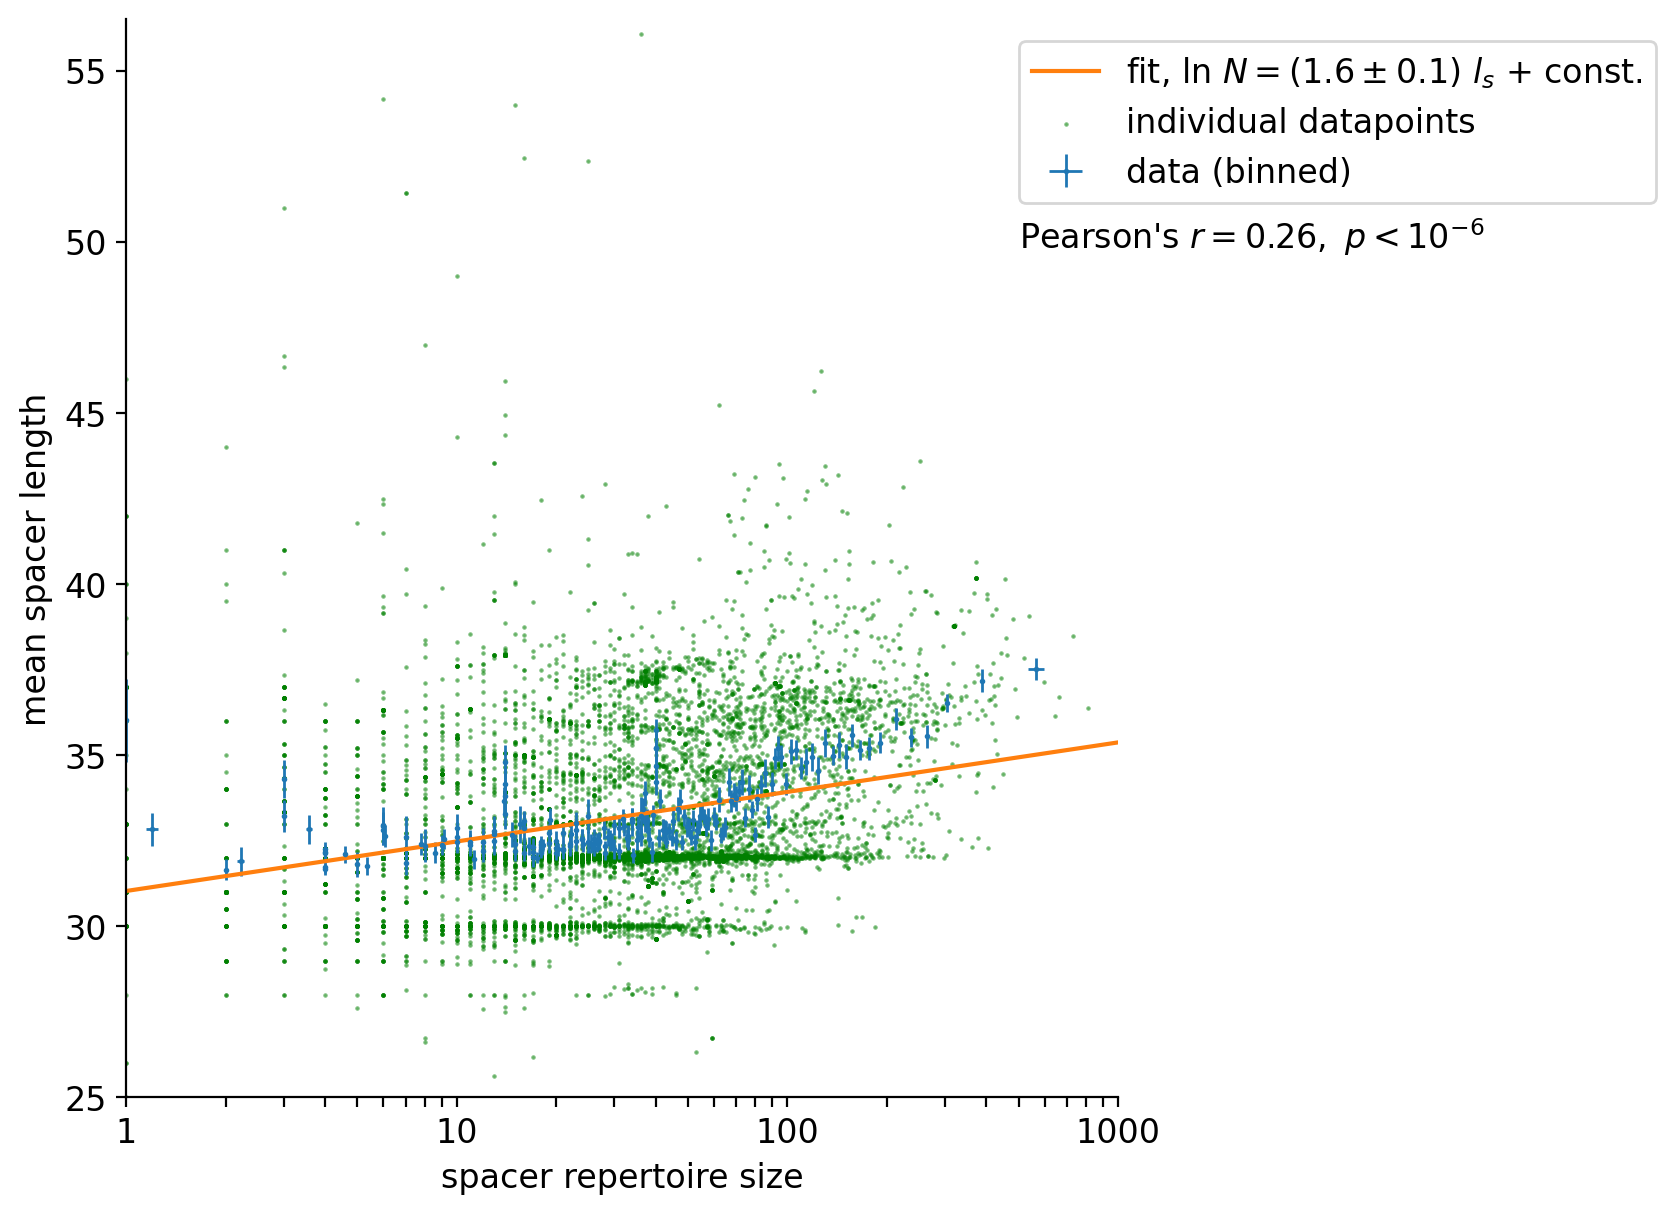

In [29]:
rho_nof, m_nof, c_nof, dm_nof, dc_nof, = generate_scaling_plot(repsizes_nof, mspacerlens_nof,
    saveplot=false);

In [30]:
# pvalue_linreg(m_nof, log10.(repsizes_nof), mspacerlens_nof)

output: 0.0

In [31]:
# pvalue_Pearson(rho_nof, log10.(repsizes_nof), mspacerlens_nof)

output: 0.0

In [32]:
# no. of datapoints excluded
inds = findall(x->x<25||x>56.5,mspacerlens_nof)
[repsizes_nof[inds] mspacerlens_nof[inds]]

1×2 Matrix{Float64}:
 1.0  89.0